In [25]:
import pandas as pd

# Charger les données d'entraînement
train_data = pd.read_csv('data_train.csv')

# Obtenir des informations de base
print(f"Nombre total d'échantillons dans le jeu d'entraînement: {len(train_data)}")

# Vérifier les noms des colonnes
print(f"Colonnes: {train_data.columns.tolist()[:10]}...")  # Afficher les 10 premières colonnes

# Calculer le nombre de classes uniques
if 'Class Label' in train_data.columns:
    unique_classes = train_data['Class Label'].unique()
    num_classes = len(unique_classes)
    print(f"Nombre de classes uniques: {num_classes}")
    print(f"Classes: {sorted(unique_classes)}")
    
    # Distribution des classes
    class_distribution = train_data['Class Label'].value_counts()
    print("Distribution des classes (top 10):")
    print(class_distribution.head(10))

Nombre total d'échantillons dans le jeu d'entraînement: 28328
Colonnes: ['ID', 'Class Label', 'Value 1', 'Value 2', 'Value 3', 'Value 4', 'Value 5', 'Value 6', 'Value 7', 'Value 8']...
Nombre de classes uniques: 40
Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Distribution des classes (top 10):
Class Label
4     829
15    825
20    824
12    822
6     819
2     811
33    802
13    792
21    778
18    778
Name: count, dtype: int64


In [26]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pour les réseaux de neurones
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
# Architecture CNN améliorée
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Reshape


# Pour gérer les warnings
import warnings
warnings.filterwarnings('ignore')

Chargement des données...
Nombre d'échantillons dans le jeu d'entraînement: 28328
Nombre d'échantillons dans le jeu de test: 4880

Aperçu des données d'entraînement:
   ID  Class Label  Value 1  Value 2  Value 3  Value 4  Value 5  Value 6  \
0   0            0        0        0        0        0        0        0   
1   1            0        0        0        0        0        0        0   
2   2            0        0        0        0        0        0        0   
3   3            0        0        0        0        0        0        0   
4   4            0        0        0        0        0        0        0   

   Value 7  Value 8  ...  Value 775  Value 776  Value 777  Value 778  \
0        0        0  ...          0          0          0          0   
1        0        0  ...        255          1          0          2   
2        0        0  ...        255          1          0          2   
3        0        0  ...          0          0          0          0   
4        0       

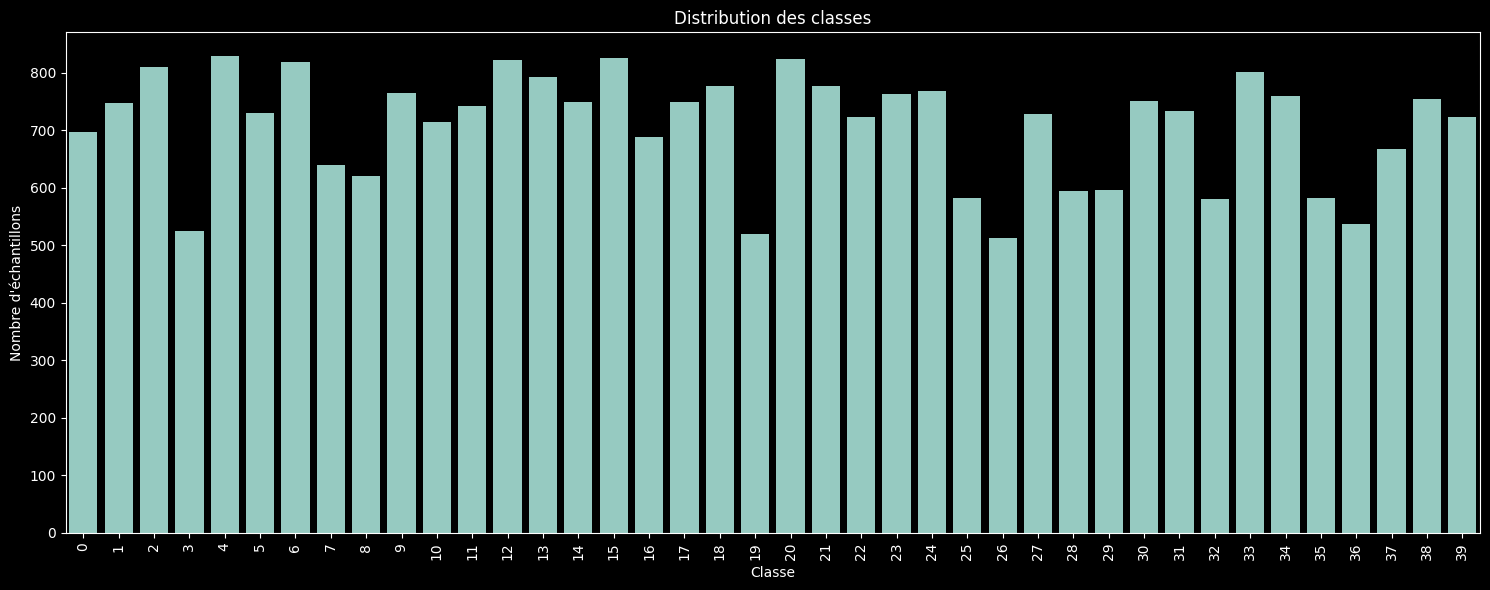


Visualisation de quelques échantillons d'entraînement:


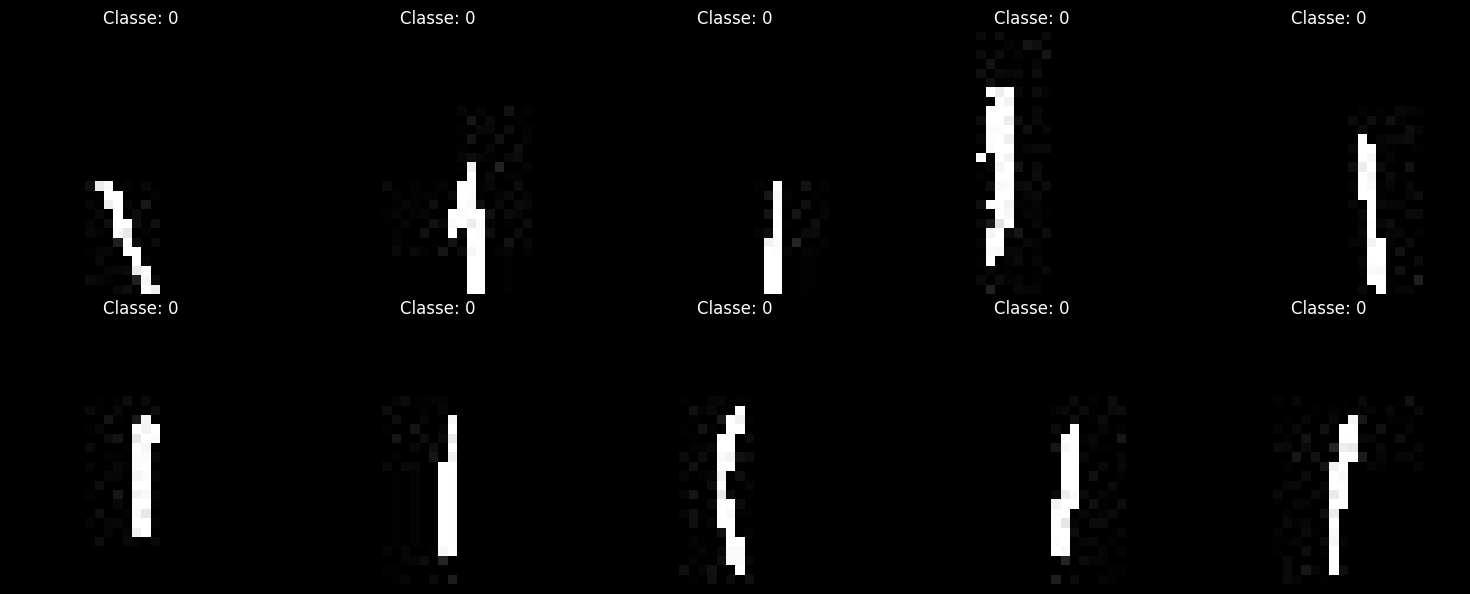

In [27]:
# Définition des chemins des fichiers
train_path = 'data_train.csv'  # Remplacez par le chemin réel
test_path = 'data_test_mlp_final.csv'      # Remplacez par le chemin réel
Sample_Submission_path = 'samplesubmission.csv' # Chemin vers le fichier sample_submission

# 1. CHARGEMENT ET EXPLORATION DES DONNÉES
print("Chargement des données...")
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
Sample_Submission = pd.read_csv(Sample_Submission_path)

print(f"Nombre d'échantillons dans le jeu d'entraînement: {len(train_data)}")
print(f"Nombre d'échantillons dans le jeu de test: {len(test_data)}")

# Affichage de quelques informations sur les données d'entraînement
print("\nAperçu des données d'entraînement:")
print(train_data.head())

# Vérification des valeurs manquantes
print("\nValeurs manquantes dans les données d'entraînement:", train_data.isnull().sum().sum())
print("Valeurs manquantes dans les données de test:", test_data.isnull().sum().sum())

# Informations sur les classes
num_classes = len(train_data['Class Label'].unique())
print(f"\nNombre de classes: {num_classes}")
print("\nDistribution des classes:")
class_distribution = train_data['Class Label'].value_counts()
print(class_distribution)

# Visualisation de la distribution des classes
plt.figure(figsize=(15, 6))
sns.countplot(x='Class Label', data=train_data)
plt.title('Distribution des classes')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

# Visualisation de quelques échantillons
def plot_samples(data, n_samples=5, n_rows=1):
    plt.figure(figsize=(15, 3*n_rows))
    
    for i in range(min(n_samples, len(data))):
        plt.subplot(n_rows, n_samples//n_rows, i+1)
        
        # Pour les données d'entraînement (avec étiquettes)
        if 'Class Label' in data.columns:
            img_data = data.iloc[i, 2:].values  # À partir de la 3ème colonne (après ID et Class Label)
            class_label = data.iloc[i, 1]
            title = f"Classe: {class_label}"
        # Pour les données de test (sans étiquettes)
        else:
            img_data = data.iloc[i, 1:].values  # À partir de la 2ème colonne (après ID)
            title = f"Test ID: {data.iloc[i, 0]}"
        
        # Reshape en image 28x28
        img = img_data.reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('sample_images.png')
    plt.show()

# Visualisation de quelques échantillons d'entraînement
print("\nVisualisation de quelques échantillons d'entraînement:")
plot_samples(train_data, n_samples=10, n_rows=2)

In [28]:
train_path = 'data_train.csv'  
test_path = 'data_test_mlp_final.csv'      
Sample_Submission_path = 'samplesubmission.csv' 

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
Sample_Submission = pd.read_csv(Sample_Submission_path)

print("Aperçu des données d'entraînement:", train_data.shape)
print("Aperçu des données de test:", test_data.shape)
print("Aperçu des données Sample Submission:", Sample_Submission.shape)

Aperçu des données d'entraînement: (28328, 786)
Aperçu des données de test: (4880, 785)
Aperçu des données Sample Submission: (4880, 2)


In [29]:
# Calculer les statistiques précises de la distribution des classes
class_distribution = train_data['Class Label'].value_counts()
mean_samples = class_distribution.mean()
min_class = class_distribution.idxmin()
min_samples = class_distribution.min()
max_class = class_distribution.idxmax()
max_samples = class_distribution.max()
std_dev = class_distribution.std()

print(f"Nombre moyen d'échantillons par classe: {mean_samples:.2f}")
print(f"Classe la moins représentée: classe {min_class} ({min_samples} échantillons)")
print(f"Classe la plus représentée: classe {max_class} ({max_samples} échantillons)")
print(f"Écart-type: {std_dev:.2f} échantillons")

Nombre moyen d'échantillons par classe: 708.20
Classe la moins représentée: classe 26 (512 échantillons)
Classe la plus représentée: classe 4 (829 échantillons)
Écart-type: 95.12 échantillons


In [30]:
# 2. PRÉPARATION DES DONNÉES

# Séparation des caractéristiques et des étiquettes pour l'entraînement
X_train = train_data.iloc[:, 2:].values  # Toutes les colonnes sauf ID et Class Label
y_train = train_data['Class Label'].values

# Préparation des données de test
X_test = test_data.iloc[:, 1:].values  # Toutes les colonnes sauf ID

# Normalisation des données
X_train = X_train / 255.0
X_test = X_test / 255.0

# Conversion des étiquettes en format one-hot
y_train_onehot = to_categorical(y_train, num_classes=num_classes)

# Division du jeu d'entraînement en entraînement et validation
X_train_final, X_val, y_train_onehot_final, y_val_onehot = train_test_split(
    X_train, y_train_onehot, test_size=0.2, random_state=42, stratify=y_train_onehot
)

print(f"Forme des données d'entraînement: {X_train_final.shape}")
print(f"Forme des données de validation: {X_val.shape}")


Forme des données d'entraînement: (22662, 784)
Forme des données de validation: (5666, 784)


# CNN

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228,904 (894.16 KB)

 Trainable params: 228,904 (894.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3265 - loss: 2.4097
Epoch 1: val_accuracy improved from -inf to 0.74020, saving model to best_urdu_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.3269 - loss: 2.4082 - val_accuracy: 0.7402 - val_loss: 0.8960 - learning_rate: 0.0010
Epoch 2/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6649 - loss: 1.3870
Epoch 2: val_accuracy improved from 0.74020 to 0.81610, saving model to best_urdu_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.6649 - loss: 1.3871 - val_accuracy: 0.8161 - val_loss: 0.7746 - learning_rate: 0.0010
Epoch 3/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7270 - loss: 1.5164
Epoch 3: val_accuracy improved from 0.81610 to 0.82369, saving model to best_urdu_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.7271 - loss: 1.5168 - val_accuracy: 0.8237 - val_loss: 1.0927 - learning_rate: 0.0010
Epoch 4/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7549 - loss: 1.7946
Epoch 4: val_accuracy improved from 0.82369 to 0.82898, saving model to best_urdu_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.7549 - loss: 1.7948 - val_accuracy: 0.8290 - val_loss: 1.3672 - learning_rate: 0.0010
Epoch 5/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7780 - loss: 2.0802
Epoch 5: val_accuracy improved from 0.82898 to 0.84610, saving model to best_urdu_cnn_model.h5



Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
355/355 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.7780 - loss: 2.0809 - val_accuracy: 0.8461 - val_loss: 1.5874 - learning_rate: 0.0010
Epoch 6/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8056 - loss: 2.1625
Epoch 6: val_accuracy improved from 0.84610 to 0.86181, saving model to best_urdu_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.8056 - loss: 2.1626 - val_accuracy: 0.8618 - val_loss: 1.5974 - learning_rate: 5.0000e-04
Epoch 7/30
354/355 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8127 - loss: 2.4525
Epoch 7: val_accuracy improved from 0.86181 to 0.86693, saving model to best_urdu_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.8127 - loss: 2.4527 - val_accuracy: 0.8669 - val_loss: 1.8012 - learning_rate: 5.0000e-04
Epoch 8/30
354/355 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8137 - loss: 2.6445
Epoch 8: val_accuracy improved from 0.86693 to 0.86940, saving model to best_urdu_cnn_model.h5



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.8137 - loss: 2.6451 - val_accuracy: 0.8694 - val_loss: 1.8539 - learning_rate: 5.0000e-04
Epoch 9/30
354/355 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8227 - loss: 2.7903
Epoch 9: val_accuracy improved from 0.86940 to 0.88122, saving model to best_urdu_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.8228 - loss: 2.7901 - val_accuracy: 0.8812 - val_loss: 1.8782 - learning_rate: 2.5000e-04
Epoch 10/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8305 - loss: 2.8049
Epoch 10: val_accuracy improved from 0.88122 to 0.88369, saving model to best_urdu_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.8305 - loss: 2.8051 - val_accuracy: 0.8837 - val_loss: 1.8685 - learning_rate: 2.5000e-04
Epoch 11/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8233 - loss: 2.9516
Epoch 11: val_accuracy improved from 0.88369 to 0.88669, saving model to best_urdu_cnn_model.h5



Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
355/355 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.8233 - loss: 2.9521 - val_accuracy: 0.8867 - val_loss: 2.0785 - learning_rate: 2.5000e-04
Epoch 12/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8371 - loss: 3.0095
Epoch 12: val_accuracy improved from 0.88669 to 0.89128, saving model to best_urdu_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.8371 - loss: 3.0096 - val_accuracy: 0.8913 - val_loss: 1.9564 - learning_rate: 1.2500e-04
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.


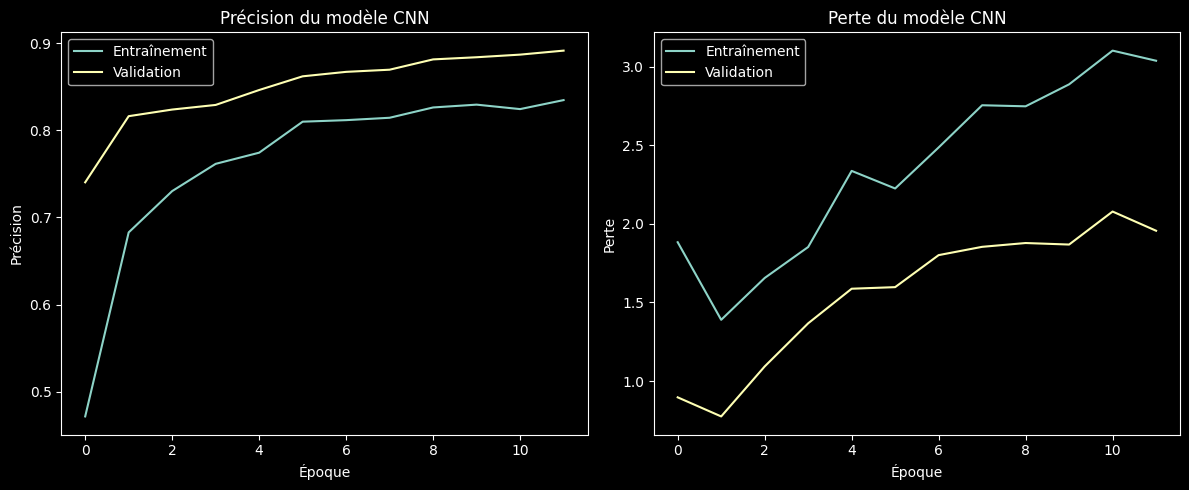

178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


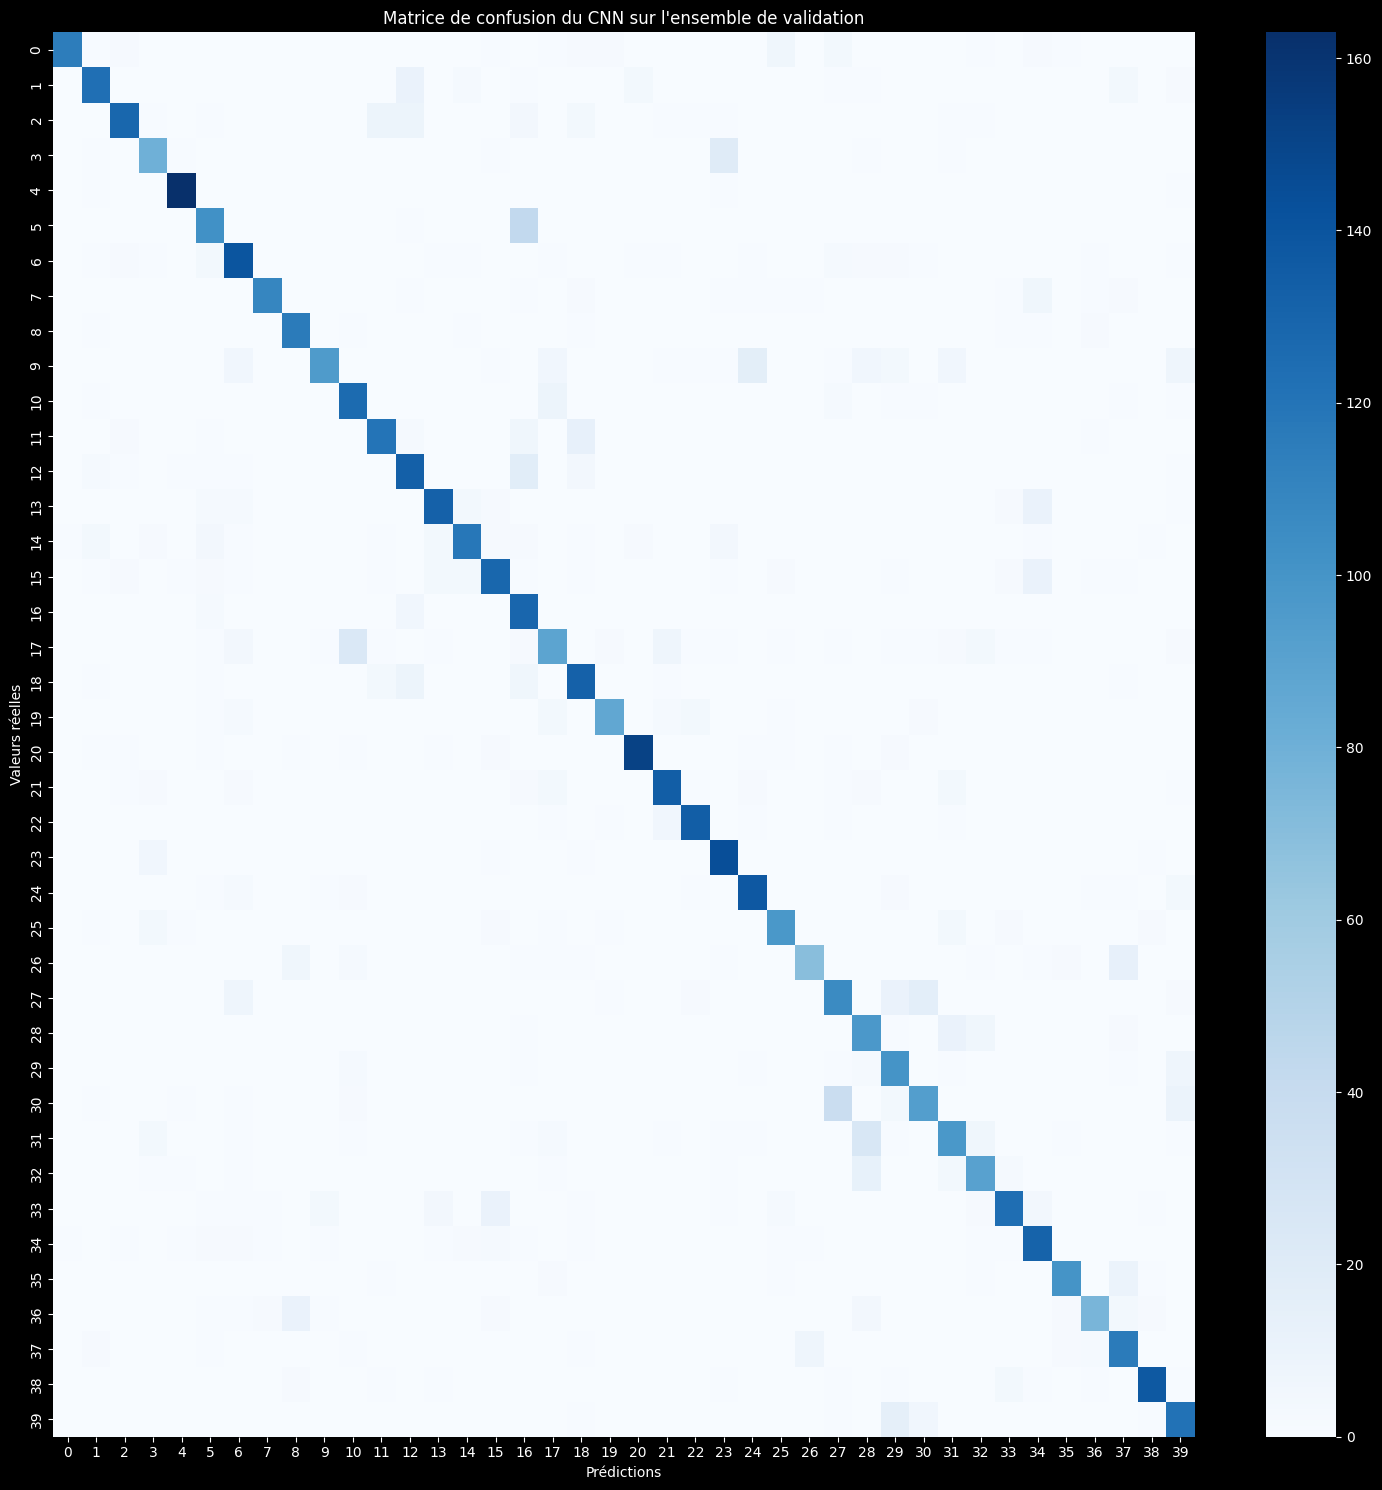

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       139
           1       0.86      0.82      0.84       150
           2       0.91      0.79      0.85       162
           3       0.79      0.76      0.78       105
           4       0.96      0.98      0.97       166
           5       0.77      0.70      0.73       146
           6       0.78      0.85      0.81       164
           7       0.96      0.85      0.90       128
           8       0.85      0.94      0.89       124
           9       0.92      0.62      0.74       153
          10       0.77      0.88      0.82       143
          11       0.87      0.81      0.84       148
          12       0.77      0.81      0.79       164
          13       0.88      0.84      0.86       158
          14       0.89      0.79      0.83       150
          15       0.82      0.78      0.80       165
          16       0.58      0.93      0.71       138
          17       0.72    

In [ ]:
# Remodeler les données pour CNN
X_train_cnn = X_train_final.reshape(-1, 28, 28, 1)
X_val_cnn = X_val.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Modèle CNN simple
cnn_model = Sequential([
    # Première couche de convolution
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Deuxième couche de convolution
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Aplatissement et couches denses
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compilation du modèle
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),  # Taux d'apprentissage un peu plus élevé pour le CNN
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Résumé du modèle
cnn_model.summary()

# Callbacks
cnn_callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_urdu_cnn_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)
]

# Entraînement du modèle CNN
history_cnn = cnn_model.fit(
    X_train_cnn, y_train_onehot_final,
    epochs=30,
    batch_size=64,  # Batch size plus grand pour le CNN
    validation_data=(X_val_cnn, y_val_onehot),
    callbacks=cnn_callbacks,
    verbose=1
)

# Visualisation de l'historique d'entraînement
plt.figure(figsize=(12, 5))

# Graphique de précision
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Entraînement')
plt.plot(history_cnn.history['val_accuracy'], label='Validation')
plt.title('Précision du modèle CNN')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

# Graphique de perte
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Entraînement')
plt.plot(history_cnn.history['val_loss'], label='Validation')
plt.title('Perte du modèle CNN')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

plt.tight_layout()
plt.savefig('cnn_training_history.png')
plt.show()

# Calcul des prédictions sur l'ensemble de validation
y_val_pred = cnn_model.predict(X_val_cnn)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val_onehot, axis=1)

# Matrice de confusion
plt.figure(figsize=(15, 15))
conf_mat = confusion_matrix(y_val_true_classes, y_val_pred_classes)
sns.heatmap(conf_mat, annot=False, cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Matrice de confusion du CNN sur l\'ensemble de validation')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.tight_layout()
plt.savefig('cnn_confusion_matrix.png')
plt.show()

# Rapport de classification
print(classification_report(y_val_true_classes, y_val_pred_classes))



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 446,600 (1.70 MB)

 Trainable params: 445,448 (1.70 MB)

 Non-trainable params: 1,152 (4.50 KB)

Epoch 1/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.3418 - loss: 2.4276
Epoch 1: val_accuracy improved from -inf to 0.03689, saving model to best_urdu_deeper_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 79s 193ms/step - accuracy: 0.3424 - loss: 2.4253 - val_accuracy: 0.0369 - val_loss: 6.0296 - learning_rate: 0.0010
Epoch 2/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8089 - loss: 0.6449
Epoch 2: val_accuracy improved from 0.03689 to 0.90558, saving model to best_urdu_deeper_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 44s 123ms/step - accuracy: 0.8090 - loss: 0.6447 - val_accuracy: 0.9056 - val_loss: 0.3010 - learning_rate: 0.0010
Epoch 3/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.8775 - loss: 0.4042
Epoch 3: val_accuracy improved from 0.90558 to 0.95376, saving model to best_urdu_deeper_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 65s 184ms/step - accuracy: 0.8775 - loss: 0.4041 - val_accuracy: 0.9538 - val_loss: 0.1609 - learning_rate: 0.0010
Epoch 4/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.9036 - loss: 0.3114
Epoch 4: val_accuracy did not improve from 0.95376
355/355 ━━━━━━━━━━━━━━━━━━━━ 58s 164ms/step - accuracy: 0.9036 - loss: 0.3114 - val_accuracy: 0.9396 - val_loss: 0.1952 - learning_rate: 0.0010
Epoch 5/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9228 - loss: 0.2557
Epoch 5: val_accuracy improved from 0.95376 to 0.96470, saving model to best_urdu_deeper_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.9228 - loss: 0.2557 - val_accuracy: 0.9647 - val_loss: 0.1219 - learning_rate: 0.0010
Epoch 6/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9345 - loss: 0.2164
Epoch 6: val_accuracy did not improve from 0.96470
355/355 ━━━━━━━━━━━━━━━━━━━━ 40s 113ms/step - accuracy: 0.9345 - loss: 0.2164 - val_accuracy: 0.9622 - val_loss: 0.1207 - learning_rate: 0.0010
Epoch 7/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9408 - loss: 0.1872
Epoch 7: val_accuracy improved from 0.96470 to 0.97406, saving model to best_urdu_deeper_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 45s 125ms/step - accuracy: 0.9408 - loss: 0.1872 - val_accuracy: 0.9741 - val_loss: 0.0894 - learning_rate: 0.0010
Epoch 8/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9438 - loss: 0.1761
Epoch 8: val_accuracy improved from 0.97406 to 0.97459, saving model to best_urdu_deeper_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 42s 118ms/step - accuracy: 0.9438 - loss: 0.1761 - val_accuracy: 0.9746 - val_loss: 0.0947 - learning_rate: 0.0010
Epoch 9/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9530 - loss: 0.1557
Epoch 9: val_accuracy did not improve from 0.97459
355/355 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - accuracy: 0.9530 - loss: 0.1557 - val_accuracy: 0.9735 - val_loss: 0.0907 - learning_rate: 0.0010
Epoch 10/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9532 - loss: 0.1538
Epoch 10: val_accuracy improved from 0.97459 to 0.97653, saving model to best_urdu_deeper_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 37s 103ms/step - accuracy: 0.9532 - loss: 0.1538 - val_accuracy: 0.9765 - val_loss: 0.0804 - learning_rate: 0.0010
Epoch 11/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9499 - loss: 0.1563
Epoch 11: val_accuracy did not improve from 0.97653
355/355 ━━━━━━━━━━━━━━━━━━━━ 39s 110ms/step - accuracy: 0.9499 - loss: 0.1563 - val_accuracy: 0.9702 - val_loss: 0.1014 - learning_rate: 0.0010
Epoch 12/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9578 - loss: 0.1310
Epoch 12: val_accuracy did not improve from 0.97653
355/355 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.9578 - loss: 0.1310 - val_accuracy: 0.9712 - val_loss: 0.0998 - learning_rate: 0.0010
Epoch 13/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9590 - loss: 0.1248
Epoch 13: val_accuracy did not improve from 0.97653

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
355/355 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - accuracy: 0.9590 - lo

355/355 ━━━━━━━━━━━━━━━━━━━━ 48s 134ms/step - accuracy: 0.9717 - loss: 0.0954 - val_accuracy: 0.9781 - val_loss: 0.0710 - learning_rate: 5.0000e-04
Epoch 15/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.9717 - loss: 0.0881
Epoch 15: val_accuracy improved from 0.97812 to 0.98112, saving model to best_urdu_deeper_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 44s 124ms/step - accuracy: 0.9717 - loss: 0.0881 - val_accuracy: 0.9811 - val_loss: 0.0692 - learning_rate: 5.0000e-04
Epoch 16/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9744 - loss: 0.0816
Epoch 16: val_accuracy improved from 0.98112 to 0.98182, saving model to best_urdu_deeper_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 44s 123ms/step - accuracy: 0.9744 - loss: 0.0816 - val_accuracy: 0.9818 - val_loss: 0.0632 - learning_rate: 5.0000e-04
Epoch 17/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9754 - loss: 0.0746
Epoch 17: val_accuracy improved from 0.98182 to 0.98235, saving model to best_urdu_deeper_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 40s 111ms/step - accuracy: 0.9754 - loss: 0.0746 - val_accuracy: 0.9824 - val_loss: 0.0645 - learning_rate: 5.0000e-04
Epoch 18/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9757 - loss: 0.0739
Epoch 18: val_accuracy did not improve from 0.98235
355/355 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.9757 - loss: 0.0739 - val_accuracy: 0.9783 - val_loss: 0.0754 - learning_rate: 5.0000e-04
Epoch 19/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.9802 - loss: 0.0664
Epoch 19: val_accuracy did not improve from 0.98235

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
355/355 ━━━━━━━━━━━━━━━━━━━━ 44s 123ms/step - accuracy: 0.9802 - loss: 0.0665 - val_accuracy: 0.9799 - val_loss: 0.0709 - learning_rate: 5.0000e-04
Epoch 20/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9810 - loss: 0.0601
Epoch 20: val_accuracy improved from 0.98235 to 0.98341, saving model to best_urdu_deeper_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 40s 112ms/step - accuracy: 0.9810 - loss: 0.0601 - val_accuracy: 0.9834 - val_loss: 0.0615 - learning_rate: 2.5000e-04
Epoch 21/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9829 - loss: 0.0551
Epoch 21: val_accuracy did not improve from 0.98341
355/355 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - accuracy: 0.9829 - loss: 0.0551 - val_accuracy: 0.9822 - val_loss: 0.0644 - learning_rate: 2.5000e-04
Epoch 22/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9846 - loss: 0.0494
Epoch 22: val_accuracy did not improve from 0.98341
355/355 ━━━━━━━━━━━━━━━━━━━━ 44s 124ms/step - accuracy: 0.9846 - loss: 0.0494 - val_accuracy: 0.9827 - val_loss: 0.0609 - learning_rate: 2.5000e-04
Epoch 23/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9843 - loss: 0.0497
Epoch 23: val_accuracy improved from 0.98341 to 0.98359, saving model to best_urdu_deeper_cnn_model.h5


355/355 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step - accuracy: 0.9843 - loss: 0.0497 - val_accuracy: 0.9836 - val_loss: 0.0599 - learning_rate: 2.5000e-04
Epoch 24/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9858 - loss: 0.0457
Epoch 24: val_accuracy did not improve from 0.98359
355/355 ━━━━━━━━━━━━━━━━━━━━ 43s 119ms/step - accuracy: 0.9858 - loss: 0.0457 - val_accuracy: 0.9822 - val_loss: 0.0628 - learning_rate: 2.5000e-04
Epoch 25/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9863 - loss: 0.0467
Epoch 25: val_accuracy did not improve from 0.98359
355/355 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step - accuracy: 0.9863 - loss: 0.0467 - val_accuracy: 0.9808 - val_loss: 0.0640 - learning_rate: 2.5000e-04
Epoch 26/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9872 - loss: 0.0403
Epoch 26: val_accuracy did not improve from 0.98359

Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
355/355 ━━━━━━━━━━━━━━━━━━━━ 46s 130ms/step - accuracy:

355/355 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step - accuracy: 0.9872 - loss: 0.0383 - val_accuracy: 0.9850 - val_loss: 0.0584 - learning_rate: 1.2500e-04
Epoch 30/30
355/355 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9868 - loss: 0.0380
Epoch 30: val_accuracy did not improve from 0.98500
355/355 ━━━━━━━━━━━━━━━━━━━━ 44s 122ms/step - accuracy: 0.9868 - loss: 0.0380 - val_accuracy: 0.9839 - val_loss: 0.0599 - learning_rate: 1.2500e-04
Restoring model weights from the end of the best epoch: 29.


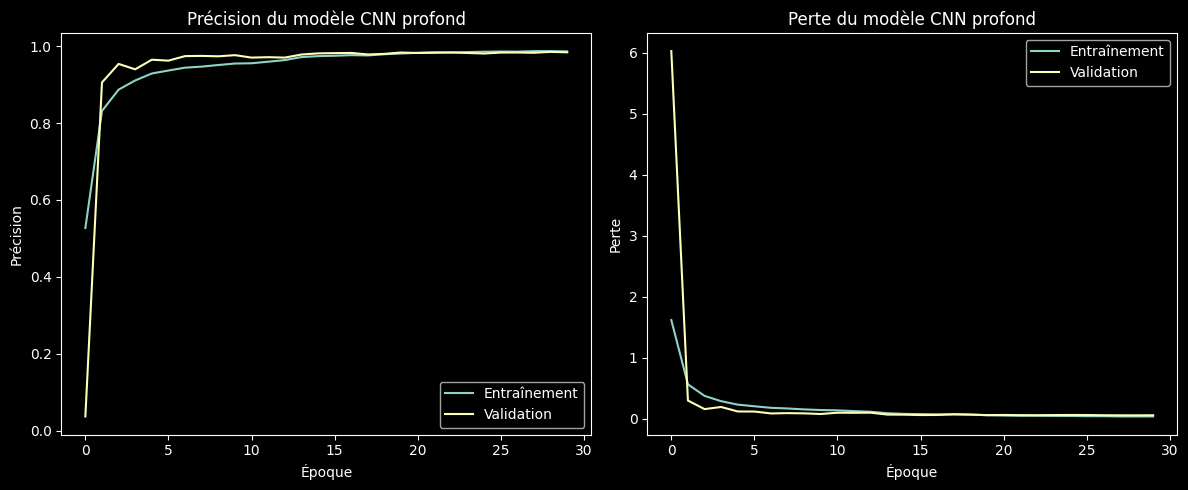

178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step


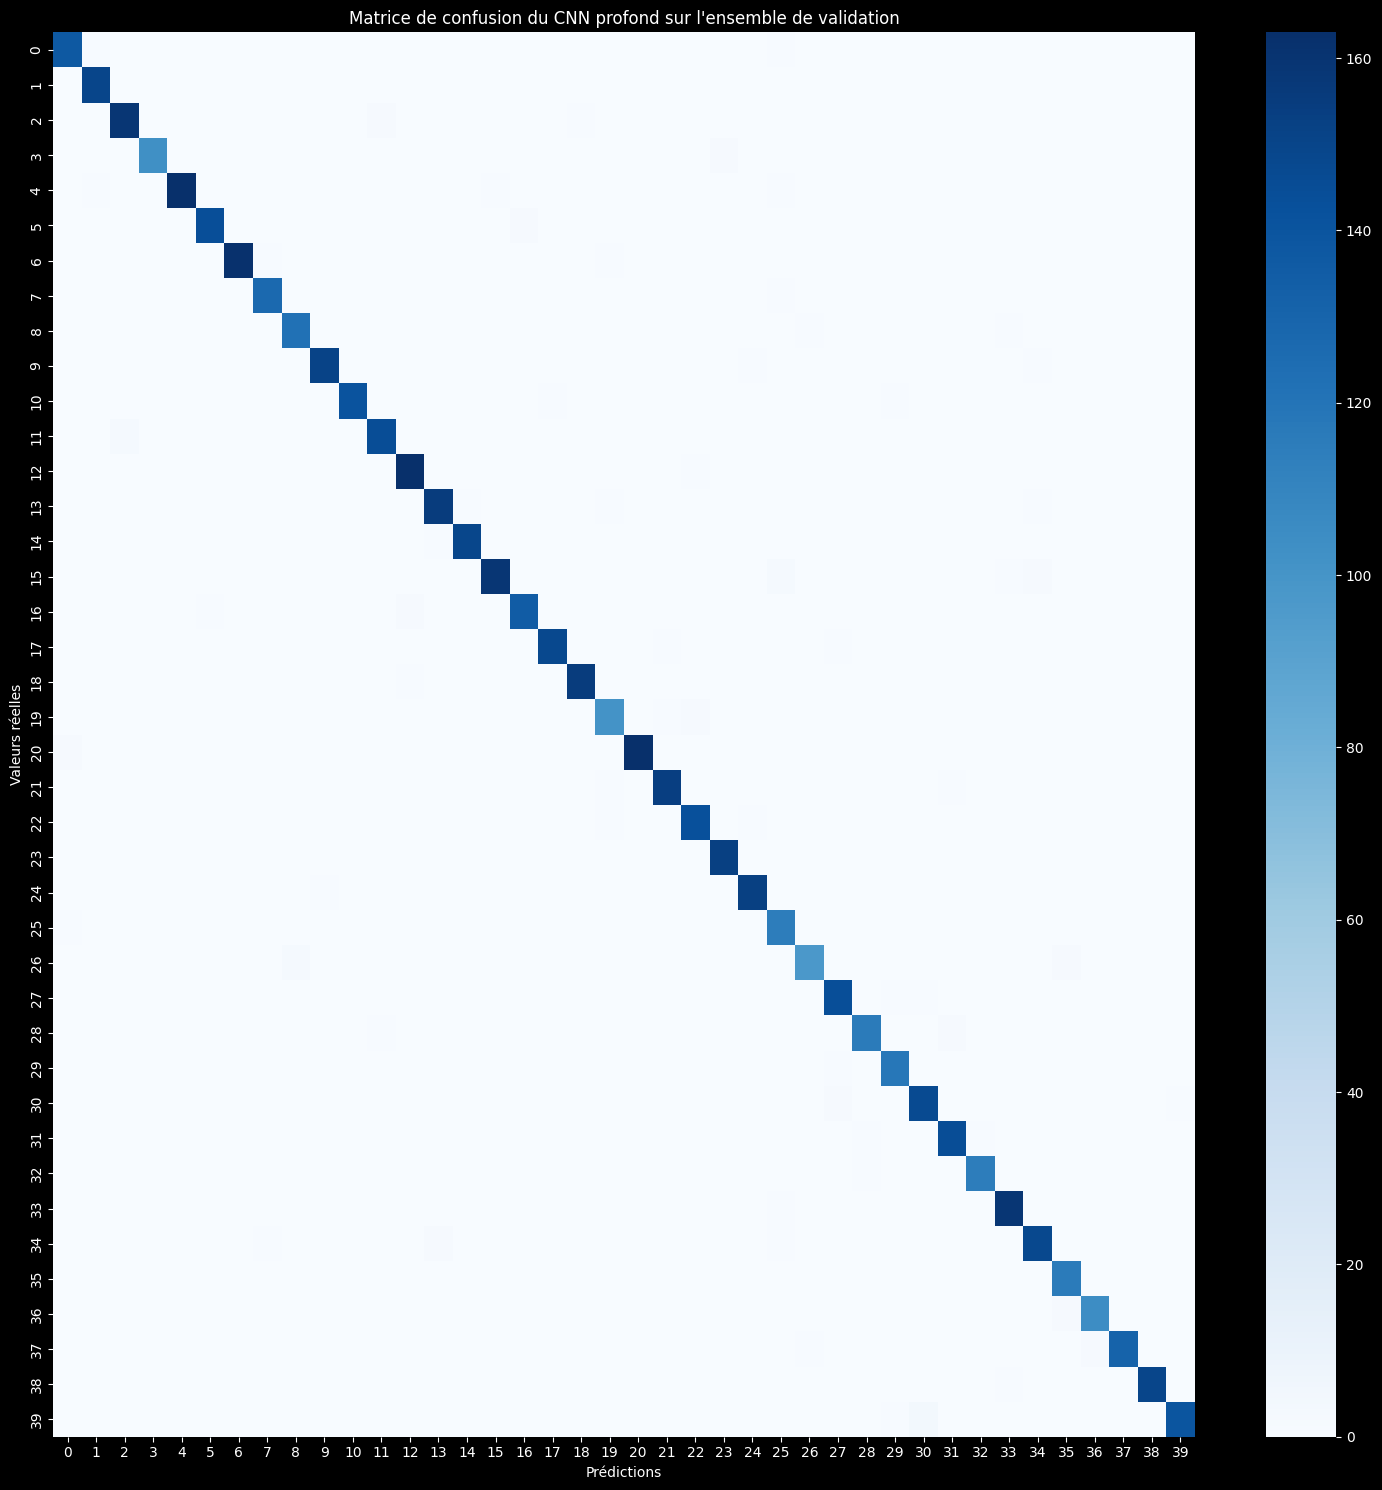

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       139
           1       0.99      1.00      0.99       150
           2       0.98      0.98      0.98       162
           3       1.00      0.98      0.99       105
           4       1.00      0.98      0.99       166
           5       0.99      0.99      0.99       146
           6       1.00      0.99      0.99       164
           7       0.98      0.99      0.99       128
           8       0.98      0.98      0.98       124
           9       0.99      0.99      0.99       153
          10       1.00      0.99      0.99       143
          11       0.98      0.98      0.98       148
          12       0.98      0.99      0.99       164
          13       0.98      0.98      0.98       158
          14       0.99      0.99      0.99       150
          15       0.99      0.96      0.98       165
          16       0.99      0.98      0.98       138
          17       0.99    

In [ ]:
# Importations nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Remodeler les données pour CNN
X_train_cnn = X_train_final.reshape(-1, 28, 28, 1)
X_val_cnn = X_val.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Modèle CNN plus profond
deeper_cnn_model = Sequential([
    # Première couche de convolution
    Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Deuxième couche de convolution
    Conv2D(64, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Troisième couche de convolution
    Conv2D(128, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Aplatissement et couches denses
    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compilation du modèle
deeper_cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Résumé du modèle
deeper_cnn_model.summary()

# Callbacks
deeper_callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_urdu_deeper_cnn_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)
]

# Entraînement du modèle CNN plus profond
history_deeper = deeper_cnn_model.fit(
    X_train_cnn, y_train_onehot_final,
    epochs=30,
    batch_size=64,
    validation_data=(X_val_cnn, y_val_onehot),
    callbacks=deeper_callbacks,
    verbose=1
)

# Visualisation de l'historique d'entraînement
plt.figure(figsize=(12, 5))

# Graphique de précision
plt.subplot(1, 2, 1)
plt.plot(history_deeper.history['accuracy'], label='Entraînement')
plt.plot(history_deeper.history['val_accuracy'], label='Validation')
plt.title('Précision du modèle CNN profond')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

# Graphique de perte
plt.subplot(1, 2, 2)
plt.plot(history_deeper.history['loss'], label='Entraînement')
plt.plot(history_deeper.history['val_loss'], label='Validation')
plt.title('Perte du modèle CNN profond')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

plt.tight_layout()
plt.savefig('deeper_cnn_training_history.png')
plt.show()

# Calcul des prédictions sur l'ensemble de validation
y_val_pred = deeper_cnn_model.predict(X_val_cnn)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val_onehot, axis=1)

# Matrice de confusion
plt.figure(figsize=(15, 15))
conf_mat = confusion_matrix(y_val_true_classes, y_val_pred_classes)
sns.heatmap(conf_mat, annot=False, cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Matrice de confusion du CNN profond sur l\'ensemble de validation')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.tight_layout()
plt.savefig('deeper_cnn_confusion_matrix.png')
plt.show()

# Rapport de classification
print(classification_report(y_val_true_classes, y_val_pred_classes))


178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.9835 - loss: 0.0646
Précision finale sur l'ensemble de validation: 0.9850
Génération des prédictions sur l'ensemble de test...
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
Fichier de soumission créé avec succès: submission_deeper_cnn.csv

Aperçu du fichier de soumission:
   Id  Prediction
0   1          12
1   2          39
2   3           0
3   4           4
4   5          33
5   6          36
6   7          12
7   8          39
8   9           0
9  10           0

Distribution des classes prédites:
0     143
1     143
2     145
3     144
4     109
5     147
6     110
7     111
8     111
9     124
10    130
11    116
12    145
13    110
14    108
15    111
16    143
17    128
18    115
19    110
20    110
21    105
22    112
23    147
24    123
25    102
26     94
27    129
28    146
29    105
30    102
31    145
32    143
33    134
34    112
35    100
36    100
37    117
38    124
39    127
Name: count, dtype: int64


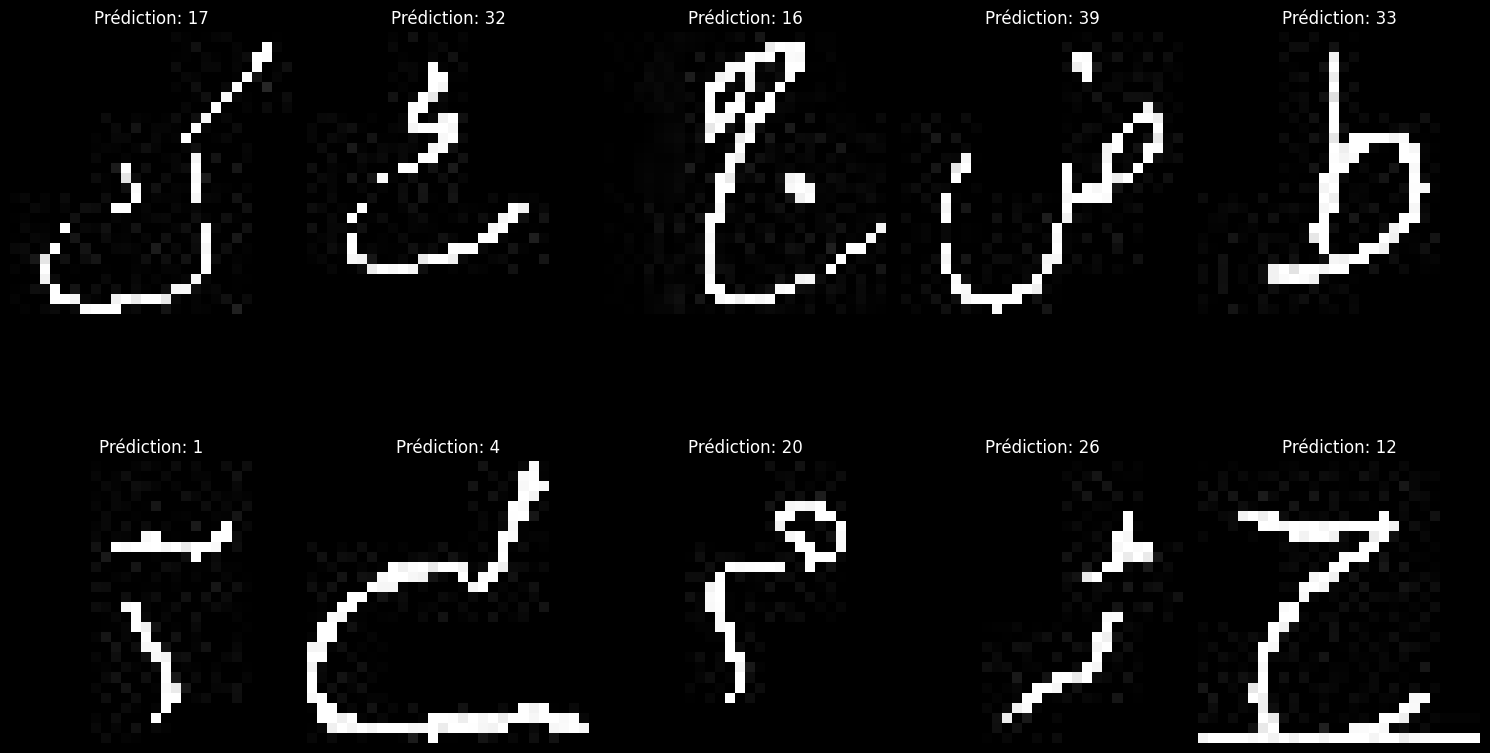

In [17]:
# Chargement du meilleur modèle
from tensorflow.keras.models import load_model

# Charger le modèle avec les meilleurs poids
best_model = load_model('best_urdu_deeper_cnn_model.h5')

# Vérification rapide sur l'ensemble de validation
val_loss, val_accuracy = best_model.evaluate(X_val_cnn, y_val_onehot, verbose=1)
print(f"Précision finale sur l'ensemble de validation: {val_accuracy:.4f}")

# Prédictions sur l'ensemble de test
print("Génération des prédictions sur l'ensemble de test...")
test_predictions = best_model.predict(X_test_cnn)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Créer le DataFrame pour la soumission
submission = pd.DataFrame({
    'Id': test_data.iloc[:, 0],  # Colonne ID du fichier de test
    'Prediction': test_pred_classes
})

# Sauvegarde du fichier de soumission
submission_file = 'submission_deeper_cnn.csv'
submission.to_csv(submission_file, index=False)
print(f"Fichier de soumission créé avec succès: {submission_file}")

# Affichage des premières lignes du fichier de soumission
print("\nAperçu du fichier de soumission:")
print(submission.head(10))

# Statistiques sur les prédictions
print("\nDistribution des classes prédites:")
pred_dist = pd.Series(test_pred_classes).value_counts().sort_index()
print(pred_dist)

# Visualisation de quelques exemples de test avec leurs prédictions
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    idx = np.random.randint(0, len(X_test_cnn))
    img = X_test_cnn[idx].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Prédiction: {test_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('test_predictions_examples.png')
plt.show()

# MLP

Epoch 1/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3238 - loss: 2.4352
Epoch 1: val_accuracy improved from -inf to 0.54571, saving model to best_urdu_mlp_model.h5


709/709 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3240 - loss: 2.4346 - val_accuracy: 0.5457 - val_loss: 1.5637
Epoch 2/50
707/709 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5288 - loss: 1.6524
Epoch 2: val_accuracy improved from 0.54571 to 0.54695, saving model to best_urdu_mlp_model.h5


709/709 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5287 - loss: 1.6527 - val_accuracy: 0.5469 - val_loss: 1.6195
Epoch 3/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5035 - loss: 1.9692
Epoch 3: val_accuracy did not improve from 0.54695
709/709 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5035 - loss: 1.9694 - val_accuracy: 0.5335 - val_loss: 1.8893
Epoch 4/50
706/709 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4589 - loss: 2.7790
Epoch 4: val_accuracy improved from 0.54695 to 0.55665, saving model to best_urdu_mlp_model.h5


709/709 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4588 - loss: 2.7806 - val_accuracy: 0.5567 - val_loss: 2.2880
Epoch 5/50
707/709 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4397 - loss: 3.8906
Epoch 5: val_accuracy did not improve from 0.55665
709/709 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4397 - loss: 3.8920 - val_accuracy: 0.5210 - val_loss: 3.2310
Epoch 6/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4304 - loss: 5.0882
Epoch 6: val_accuracy did not improve from 0.55665
709/709 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4304 - loss: 5.0886 - val_accuracy: 0.4949 - val_loss: 4.1688
Epoch 7/50
706/709 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4187 - loss: 6.4940
Epoch 7: val_accuracy did not improve from 0.55665
709/709 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4188 - loss: 6.4949 - val_accuracy: 0.5035 - val_loss: 4.7728
Epoch 8/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4223 - loss: 7.4595
Epoch 8: val_accuracy d

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 40)             │        10,280 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,630,586 (6.22 MB)

 Trainable params: 543,528 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,087,058 (4.15 MB)


Évaluation du modèle...
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5367 - loss: 1.5608
Précision sur les données de validation: 0.5457


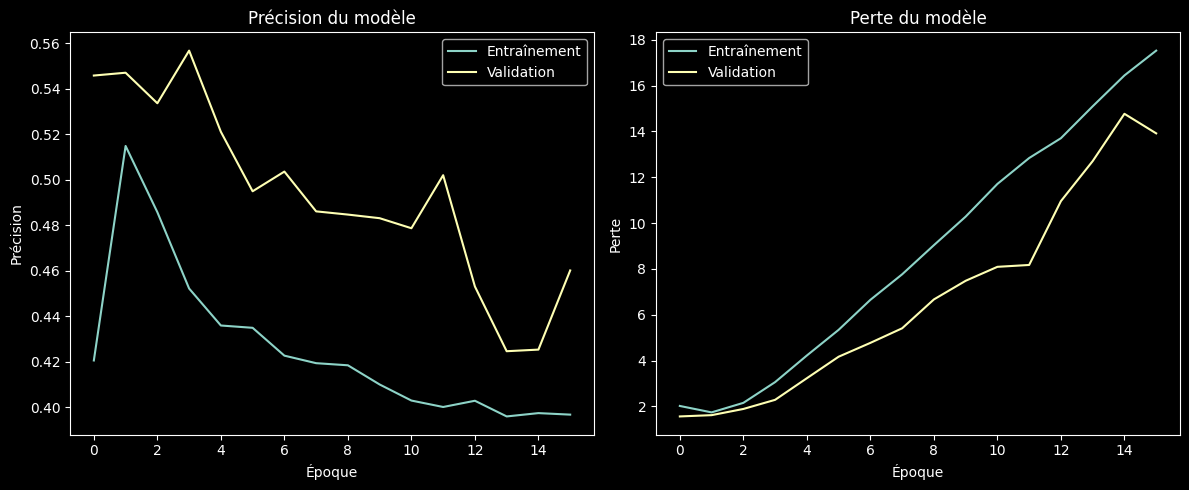

178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


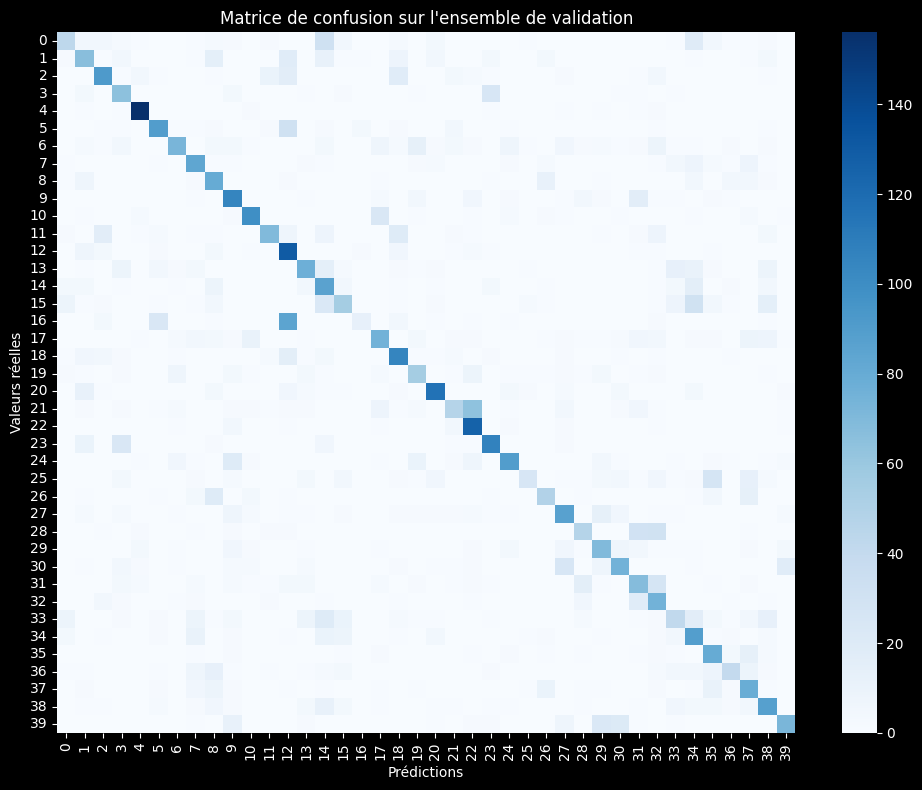


Rapport de classification sur l'ensemble de validation:
              precision    recall  f1-score   support

           0       0.54      0.31      0.39       139
           1       0.48      0.45      0.46       150
           2       0.65      0.57      0.61       162
           3       0.46      0.62      0.53       105
           4       0.87      0.94      0.90       166
           5       0.65      0.62      0.63       146
           6       0.72      0.45      0.55       164
           7       0.56      0.66      0.60       128
           8       0.43      0.65      0.52       124
           9       0.53      0.69      0.59       153
          10       0.75      0.69      0.72       143
          11       0.74      0.47      0.58       148
          12       0.40      0.79      0.53       164
          13       0.61      0.49      0.54       158
          14       0.36      0.57      0.44       150
          15       0.51      0.33      0.40       165
          16       0.65 

In [38]:

# 3. CONSTRUCTION DU MODÈLE MLP simple


# Modèle MLP simple
model = Sequential([
    # Couche d'entrée
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.15),
    
    # Couche cachée
    Dense(256, activation='relu'),
    Dropout(0.15),
    
    # Couche de sortie
    Dense(num_classes, activation='softmax')
])

# Compilation du modèle
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks pour l'entraînement
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_urdu_mlp_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
]

# Entraînement du modèle
history = model.fit(
    X_train_final, y_train_onehot_final,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val_onehot),
    callbacks=callbacks,
    verbose=1
)

model.summary()

# 5. ÉVALUATION DU MODÈLE
print("\nÉvaluation du modèle...")

# Évaluation sur l'ensemble de validation
val_loss, val_acc = model.evaluate(X_val, y_val_onehot)
print(f"Précision sur les données de validation: {val_acc:.4f}")

# Visualisation de l'historique d'entraînement
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Précision du modèle')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Perte du modèle')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

# Prédictions sur l'ensemble de validation
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val_onehot, axis=1)

# Matrice de confusion (version réduite pour visualisation)
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_val_true_classes, y_val_pred_classes)
sns.heatmap(conf_mat, annot=False, fmt='d', cmap='Blues')
plt.title('Matrice de confusion sur l\'ensemble de validation')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Rapport de classification
print("\nRapport de classification sur l'ensemble de validation:")
print(classification_report(y_val_true_classes, y_val_pred_classes))

